In [135]:
#Importing Libraries
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [136]:
# Loading the dataset
iris_data = datasets.load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df.head()

# Adding the Class column
df['Class'] = iris_data.target

# Merging 'Setosa' and 'Versicolor' to a single class
df.loc[df['Class'] == 1, 'Class'] = 0
df.loc[df['Class'] == 2, 'Class'] = 1

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Construct a training set and a testing set using an 80 − 20 split
using random sampling

In [143]:
# Splitting the data using 80-20 to train and test sets using random sampling!

df_train,df_test = sklearn.model_selection.train_test_split(df, test_size=0.2, train_size=0.8, random_state=None, shuffle=True, stratify=None)


Use Logistic Regression as a “black-box” classifier and asses the
performance


In [144]:
# Creating a Logistic Regression model

model = LogisticRegression(random_state=0,max_iter = 5000)
model.fit(df_train.iloc[:,:4],df_train.iloc[:,4].values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
# Analysing the performance of the model using different evaluation metrics

Predicted = model.predict_proba(df_test[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
pred_labels = np.argmax(Predicted, axis=1)
desired_labels  = df_test['Class'].to_numpy()

# Finding accuracy and loss of the model
model_accuracy = sklearn.metrics.accuracy_score(desired_labels, pred_labels, normalize=True)
precision_pos = sklearn.metrics.precision_score(desired_labels, pred_labels,labels=None, pos_label=1, average='binary', sample_weight=None)
precision_neg = sklearn.metrics.precision_score(desired_labels, pred_labels,labels=None, pos_label=0, average='binary', sample_weight=None)
recall_pos = sklearn.metrics.recall_score(desired_labels, pred_labels,labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
recall_neg = sklearn.metrics.recall_score(desired_labels, pred_labels,labels=None, pos_label=0, average='binary', sample_weight=None, zero_division='warn')
Log_Loss = sklearn.metrics.log_loss(desired_labels, Predicted,normalize= False)
con_matrix = confusion_matrix(desired_labels,pred_labels)

# Results
print('Desired Labels: ', desired_labels)
print('Predicted Labels: ', pred_labels)
print('Model Accuracy: ', model_accuracy)
print('Precision_Pos:', precision_pos)
print('Precision_Neg: ',precision_neg)
print('Recall_Pos:', recall_pos)
print('Recall_Neg: ',recall_neg)
print('Log Loss: ', Log_Loss)
print('Confusion Matrix: \n',con_matrix)


Desired Labels:  [0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
Predicted Labels:  [0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1]
Model Accuracy:  0.9333333333333333
Precision_Pos: 0.7142857142857143
Precision_Neg:  1.0
Recall_Pos: 1.0
Recall_Neg:  0.92
Log Loss:  3.746629809813724
Confusion Matrix: 
 [[23  2]
 [ 0  5]]


In [149]:
# Using cross-validation
scores = cross_val_score(model, df.iloc[:,:4],df.iloc[:,4].values.ravel(), cv=5)
print('Accuracy: ', scores.mean())
y_pred = cross_val_predict(model, df.iloc[:,:4],df.iloc[:,4].values.ravel(), cv=5)
print('Confusion Matrix: ')
confusion_matrix(df.iloc[:,4],y_pred)

Accuracy:  0.9666666666666666
Confusion Matrix: 


array([[96,  4],
       [ 1, 49]])

Implement stratified sampling, again using 80% of the data for
training and 20% of the data for testing. Decide the stratification
variable and explain your choice

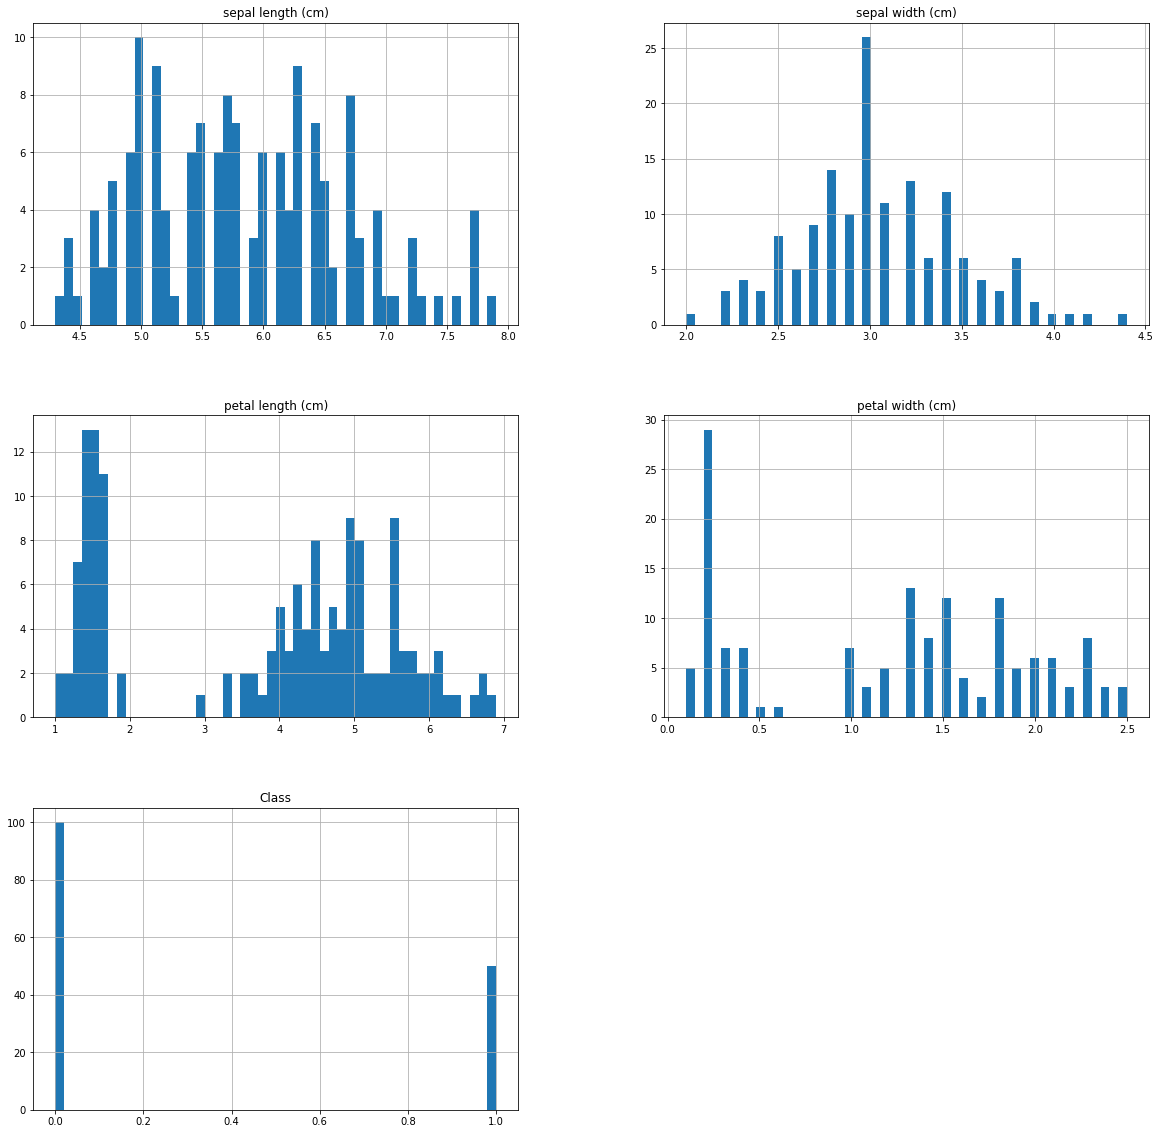

In [150]:
# Analysing the histograms of four features

df.hist(bins=50, figsize=(20,20))
plt.show()

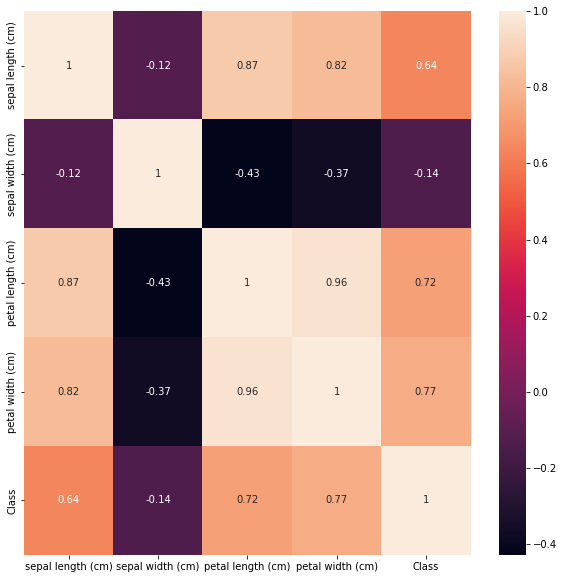

In [151]:
# Finding the feature that is most correlated with the target class

correlation = df.corr()
plt.figure(figsize =(10,10))
sns.heatmap(correlation, annot = True)


Petal Width is the feature that is most correlated with the target and hence it was categorized and used for stratified sampling. 

In [161]:
################################## Using single Train, Test pair ###############################################



# Creating a category feature out of 'petal width (cm)', which is the feature most correlated to target class
df['PetalWidth_Category'] = pd.cut(df['petal width (cm)'], bins=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5], labels = [1,2,3,4,5])

# Using Stratified Sampling to split data into a single Train, Test pair
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for tr,tst in sss.split(df.iloc[:,:4],df.iloc[:,5:]):
  df_train_ss = df.iloc[tr]
  df_test_ss = df.iloc[tst]

# Creating the model
model_ss = LogisticRegression(random_state=0,max_iter = 5000)
model_ss.fit(df_train_ss.iloc[:,:4],df_train_ss.iloc[:,4].values.ravel())

# Calculating evaluation metrics
Predicted3 = model_ss.predict_proba(df_test_ss.iloc[:,:4])
pred_labels = np.argmax(Predicted3, axis=1)
desired_labels  = df_test_ss['Class'].to_numpy()
model_accuracy = sklearn.metrics.accuracy_score(desired_labels, pred_labels, normalize=True)
precision_pos = sklearn.metrics.precision_score(desired_labels, pred_labels,labels=None, pos_label=1, average='binary', sample_weight=None)
precision_neg = sklearn.metrics.precision_score(desired_labels, pred_labels,labels=None, pos_label=0, average='binary', sample_weight=None)
recall_pos = sklearn.metrics.recall_score(desired_labels, pred_labels,labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
recall_neg = sklearn.metrics.recall_score(desired_labels, pred_labels,labels=None, pos_label=0, average='binary', sample_weight=None, zero_division='warn')

# Calculating loss
Log_Loss = sklearn.metrics.log_loss(desired_labels, Predicted3,normalize= False, sample_weight=None, labels=None)

# Calculating confusion Matrix
con_matrix = confusion_matrix(desired_labels,pred_labels)
print('Model Accuracy: ', model_accuracy)
print('Precision_Pos:', precision_pos)
print('Precision_Neg: ',precision_neg)
print('Recall_Pos:', recall_pos)
print('Recall_Neg: ',recall_neg)
print('Log Loss: ', Log_Loss)
print('Confusion Matrix: \n',con_matrix)

Model Accuracy:  0.9666666666666667
Precision_Pos: 0.9166666666666666
Precision_Neg:  1.0
Recall_Pos: 1.0
Recall_Neg:  0.9473684210526315
Log Loss:  3.3822462317186326
Confusion Matrix: 
 [[18  1]
 [ 0 11]]


In [153]:

################################## Using 5 Train, Test pairs ###############################################


data = df.copy()

# Creating a category feature out of 'petal width (cm)', which is the feature most correlated to target class
data['PetalWidth_Category'] = pd.cut(data['petal width (cm)'], bins=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5], labels = [1,2,3,4,5])

# Performing stratified sampling based on category feature to split into 5 train and test sets
sss_1 = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
Total_Model_Accuracy = 0
Total_Log_Loss = 0
for tr,tst in sss_1.split(data.iloc[:,:5],data.iloc[:,5:]):
  df_train_ss1 = data.iloc[tr]
  df_test_ss1 = data.iloc[tst]
  
  model_2 = LogisticRegression(random_state=0,max_iter = 5000)
  model_2.fit(df_train_ss1[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']],df_train_ss1['Class'].values.ravel())
  Predicted_2 = model_2.predict_proba(df_test_ss1[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])

  # Predicted and Desired labels
  pred_labels = np.argmax(Predicted_2, axis=1)
  desired_labels  = df_test_ss1['Class'].to_numpy()

  # Calculating Accuracy and Loss
  model_accuracy = sklearn.metrics.accuracy_score(desired_labels, pred_labels, normalize=True, sample_weight=None)
  Log_Loss = sklearn.metrics.log_loss(desired_labels, Predicted_2,normalize= False, sample_weight=None, labels=None)
  Total_Model_Accuracy += model_accuracy
  Total_Log_Loss += Log_Loss

  #print(model_accuracy)
  #print(pred_labels)
  #print(desired_labels)
  #print(Log_Loss)

print('Average Model Accuracy: ', Total_Model_Accuracy/5)
print('Average Loss: ', Total_Log_Loss/5)

Average Model Accuracy:  0.9666666666666666
Average Loss:  3.546968274671881
